# Make a stacked barplot of amino acid counts

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Summary data

We're going to use the summary dataset which filters only the "interesting" sites in the TMPRSS2 sequence.

This data file is in *long* format, and we will need to reshape it to *wide* format to make some data operations easier.

In [2]:
summary = pd.read_csv('../data/proc/resi_prop_delta_summary.csv')

In [3]:
summary.head()

,Unnamed: 0,iso2_zero_idx,is_interesting,resi_reference,resi_compare,is_deletion,pka_delta,mass_delta,occurrence_delta,percent_buried_delta,buried_vol_delta,vdw_delta,accessible_delta,hydrophobicity_delta,iso1_one_idx,species
0,149,149,True,C,C,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,113.0,Homo sapiens
1,156,156,True,C,C,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,Homo sapiens
2,162,162,True,C,C,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126.0,Homo sapiens
3,169,169,True,C,C,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,133.0,Homo sapiens
4,175,175,True,C,C,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,139.0,Homo sapiens


## Data reshaping

Change the index from a float to an integer:

In [4]:
summary['iso1_one_idx'] = [int(i) for i in summary['iso1_one_idx']]

Pivot the table so that there is a column for each species containing the residue at each interesting index.

In [5]:
summary_wide = summary.pivot(index='iso1_one_idx', columns='species', values='resi_compare')

In [6]:
summary_wide

species,Bos taurus,Canis lupus familiaris,Equus caballus,Felis catus,Gallus gallus,Homo sapiens,Mus musculus
iso1_one_idx,,,,,,,
113,C,H,C,H,C,C,C
120,C,P,C,P,C,C,C
126,C,C,C,C,C,C,C
133,C,C,C,C,C,C,C
139,C,C,C,C,C,C,C
148,C,C,C,C,C,C,C
172,C,C,C,C,C,C,C
185,C,C,C,C,C,C,C
223,K,-,K,-,K,K,K


Reset the index to remove the multindex. The `species` column can be ignored.

In [7]:
summary_wide.reset_index()

species,iso1_one_idx,Bos taurus,Canis lupus familiaris,Equus caballus,Felis catus,Gallus gallus,Homo sapiens,Mus musculus
0,113,C,H,C,H,C,C,C
1,120,C,P,C,P,C,C,C
2,126,C,C,C,C,C,C,C
3,133,C,C,C,C,C,C,C
4,139,C,C,C,C,C,C,C
5,148,C,C,C,C,C,C,C
6,172,C,C,C,C,C,C,C
7,185,C,C,C,C,C,C,C
8,223,K,-,K,-,K,K,K
9,224,K,S,K,S,R,K,K


## Data transformation

We need to turn the amino acid codes organized by species and index into numeric data. Specifically, we want to know the count of each amino acid type present at each index across our seven species of interest.

To accomplish this transformation we need to do several things:

- Determine how many unique amino acids are present across all the interesting sites in the dataset
- Set up an empty datastructure which will store our intermediate calculations
- Iterate over the `summary_wide` dataframe by amino acid index (by row) to make a frequency table of amino acid counts for that site

Get a list of all the unique amino acid codes present using the `numpy.values`, `numpy.flatten()` and `set()` methods:

The `numpy.values` method will extract all the values from a Pandas DataFrame:

In [8]:
summary_wide.values

array([['C', 'H', 'C', 'H', 'C', 'C', 'C'],
       ['C', 'P', 'C', 'P', 'C', 'C', 'C'],
       ['C', 'C', 'C', 'C', 'C', 'C', 'C'],
       ['C', 'C', 'C', 'C', 'C', 'C', 'C'],
       ['C', 'C', 'C', 'C', 'C', 'C', 'C'],
       ['C', 'C', 'C', 'C', 'C', 'C', 'C'],
       ['C', 'C', 'C', 'C', 'C', 'C', 'C'],
       ['C', 'C', 'C', 'C', 'C', 'C', 'C'],
       ['K', '-', 'K', '-', 'K', 'K', 'K'],
       ['K', 'S', 'K', 'S', 'R', 'K', 'K'],
       ['C', 'C', 'C', 'C', 'C', 'C', 'C'],
       ['C', 'C', 'C', 'C', 'C', 'C', 'C'],
       ['C', 'C', 'C', 'C', 'C', 'C', 'C'],
       ['C', 'C', 'C', 'C', 'C', 'C', 'C'],
       ['H', 'H', 'H', 'H', 'H', 'H', 'H'],
       ['C', 'C', 'C', 'C', 'C', 'C', 'C'],
       ['D', 'D', 'D', 'D', 'D', 'D', 'D'],
       ['C', 'C', 'C', 'C', 'C', 'C', 'C'],
       ['C', 'C', 'C', 'C', 'C', 'C', 'C'],
       ['C', 'C', 'C', 'C', 'C', 'C', 'C'],
       ['D', 'D', 'D', 'D', 'D', 'D', 'D'],
       ['C', 'C', 'C', 'C', 'C', 'C', 'C'],
       ['S', 'S', 'S', 'S', 'S',

The `numpy.flatten()` method will take a multidimensionally numpy array and flatten it to a single dimension. Here we take the multidimensional values array and flatten to one dimension:

In [9]:
summary_wide.values.flatten()

array(['C', 'H', 'C', 'H', 'C', 'C', 'C', 'C', 'P', 'C', 'P', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'K', '-', 'K', '-', 'K', 'K', 'K', 'K', 'S',
       'K', 'S', 'R', 'K', 'K', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'H', 'H', 'H', 'H', 'H', 'H',
       'H', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'D', 'D', 'D', 'D', 'D',
       'D', 'D', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'D', 'D', 'D',
       'D', 'D', 'D', 'D', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'C', 'C', 'C', 'C', 'C', 'C', 'C'],
      dtype=object)

By wrapping the `values` and `flatten` operations in the `set()` function, we can get a list of all the unique amino acid codes in the data frame. We have to flatten the array because the `set()` function will not work with multidimensional data.

In [10]:
aa_codes = set(summary_wide.values.flatten())
aa_codes

{'-', 'C', 'D', 'H', 'K', 'P', 'R', 'S'}

We ultimately want to add our counts back to the original dataframe as new columns. Each column header will be an amino acid code, and the value in the rows will be the count for that amino acid at that index. 

It is easiest to add complete columns to Pandas data frames (rather than filling in values one by one), so we will make an empty dictonary to hold all our counts until we're ready to add them to the data frame. We will use a *dictionary comprehension* to create a dictionary that has amino acid codes as keys and empty lists as values.

In [11]:
aa_dict = {aa: [] for aa in aa_codes}

In [12]:
aa_dict

{'C': [], 'K': [], 'S': [], 'R': [], 'H': [], 'P': [], 'D': [], '-': []}

Now we are ready to interate over our wide-format `summary_wide` dataframe to make our row-wise counts.

The for-loop below works as follows:
- For each row in the data frame, extract the values in the row
- For each unique amino acid in the data set, count how many occurrences of that amino acid are found in the row
- Add the count to the dictionary under the key corresponding to the amino acid under consideration, or add 0 to the dictionary if that amino acid is not found.

In [13]:
for i, row in summary_wide.iterrows():
    row_data = list(row.values) # list instead of numpy array
    for aa in aa_codes:
        if aa in row_data:
            count = row_data.count(aa)
            aa_dict[aa].append(count)
        else:
            aa_dict[aa].append(0.0)

Now that we have built our count dataset, we can add it to the `summary_wide` data frame. For each key in the dictionary, add its value (a list with one element for each index, in the same order as the `summary_wie` dataframe) as a new column in the dataframe:

In [14]:
for key, val in aa_dict.items():
    summary_wide[key] = val

Now we can reset the index to remove any lingering multi-index values, and see that we've added the appropriate counts. We can spot check the counts to make sure they are correct.

In [15]:
summary_wide.reset_index()

species,iso1_one_idx,Bos taurus,Canis lupus familiaris,Equus caballus,Felis catus,Gallus gallus,Homo sapiens,Mus musculus,C,K,S,R,H,P,D,-
0,113,C,H,C,H,C,C,C,5.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
1,120,C,P,C,P,C,C,C,5.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
2,126,C,C,C,C,C,C,C,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,133,C,C,C,C,C,C,C,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,139,C,C,C,C,C,C,C,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,148,C,C,C,C,C,C,C,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,172,C,C,C,C,C,C,C,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,185,C,C,C,C,C,C,C,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,223,K,-,K,-,K,K,K,0.0,5.0,0.0,0.0,0.0,0.0,0.0,2.0
9,224,K,S,K,S,R,K,K,0.0,4.0,2.0,1.0,0.0,0.0,0.0,0.0


## Data visualization

We only want to plot our count data, so we will extract those data by column name.

In [16]:
summary_counts = summary_wide[list(aa_codes)]

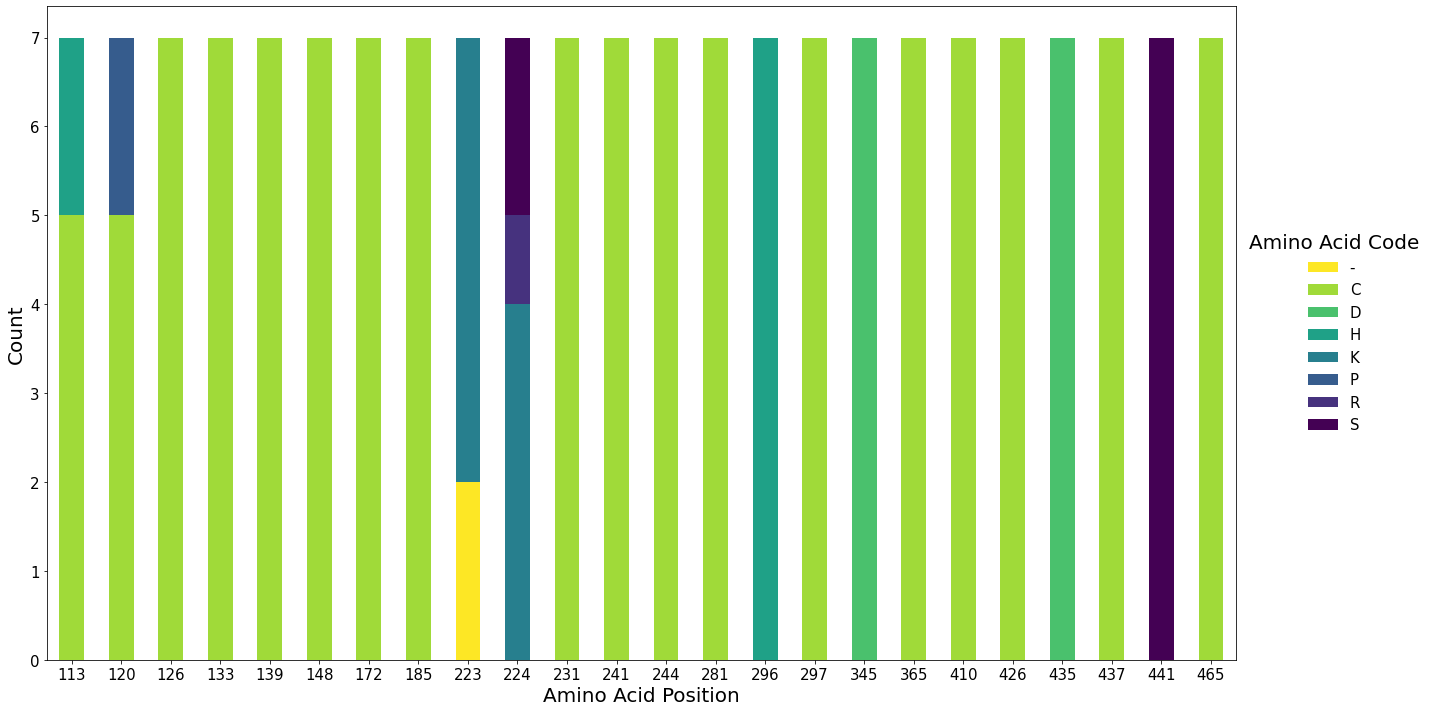

In [18]:
# set up a new matplotlib canvas that is 20 units wide and 10 units tall
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

# use the plot.bar() method for the pandas dataframe with the stacked=True argument to make a stacked bar plot
# the sorted(aa_codes) sorts the amino acid codes alphabetically so they show up in that order in the legend
# the colormap viridis is a popular plotting palette, but we can explore other color schemes
summary_counts[sorted(aa_codes)].plot.bar(stacked=True, ax=ax, fontsize=15, colormap='viridis_r')

# everything below controls plot aesthetics, since the defaults are not very appealing
# we ensure the legend is in the plot margin by setting the bbox_to_anchor value
lg = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Amino Acid Code', fontsize=15, frameon=False)

# we increase the size of the legend title by extracting the title element, assigning it to a variable, and manipulating attributes of that variable
title = lg.get_title()
title.set_fontsize(20)

# we use a similar pattern to increase the x and y tick mark font sizes and to place axis labels
ax.set_ylabel('Count', fontsize=20)
ax.set_xlabel('Amino Acid Position', fontsize=20)

# we then make sure the numbers on the x-axis are rotated properly so they're easy to read
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# finally, plt.tight_layout() performs a bit of magic to space out text and margins
plt.tight_layout()

plt.show()